In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Overview

### Train

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


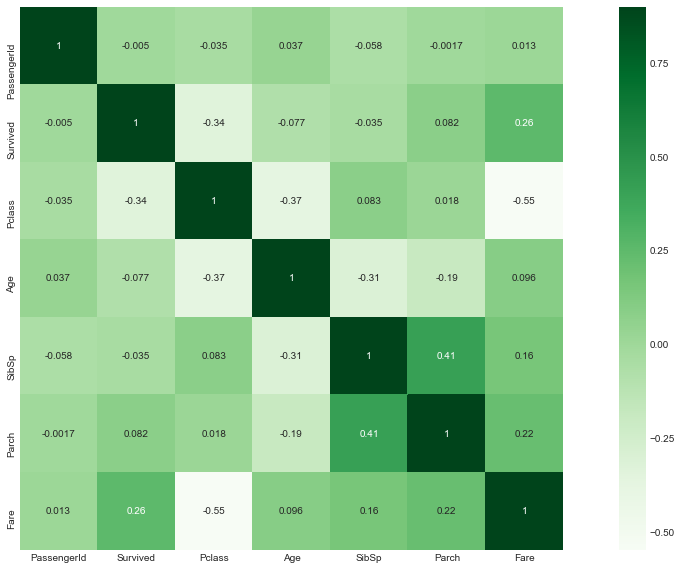

In [9]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(),cmap="Greens",square=True,vmax=0.9,annot=True)

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Test

In [11]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
test.shape

(418, 11)

In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


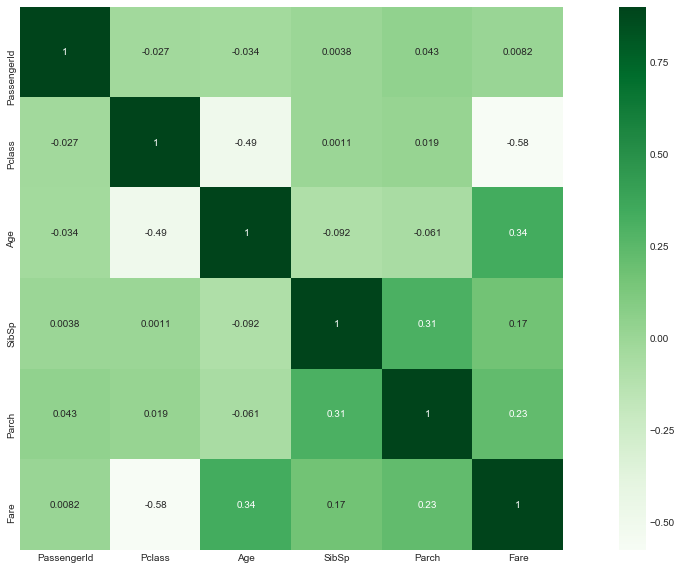

In [15]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(test.corr(),cmap="Greens",square=True,vmax=0.9,annot=True)

In [16]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Looking for missing values

### Train

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

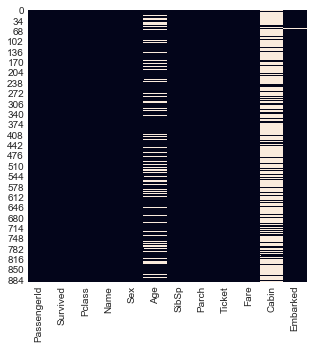

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(train.isnull(),cbar=False)

### Test

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

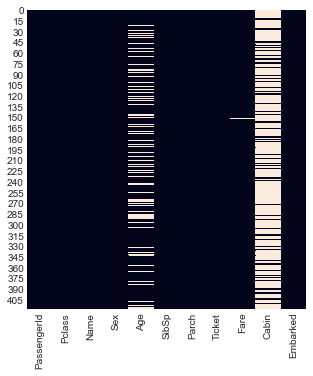

In [20]:
plt.figure(figsize=(5,5.5))
sns.heatmap(test.isnull(),cbar=False)

### PassengerId

In [21]:
train['PassengerId'].value_counts().head()

891    1
293    1
304    1
303    1
302    1
Name: PassengerId, dtype: int64

In [22]:
test['PassengerId'].value_counts().head()

1023    1
1128    1
1156    1
1157    1
1158    1
Name: PassengerId, dtype: int64

as the passengetid column in both the train and test dataset are unique and in int format, no need of any transformation

### PClass

In [23]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

1st = Upper,
2nd = Middle,
3rd = Lower

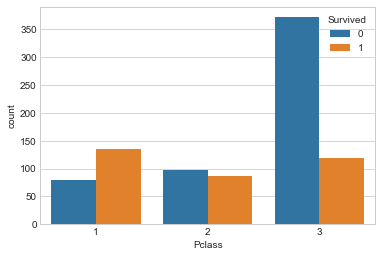

In [24]:
sns.countplot(x='Pclass',hue='Survived',data=train)

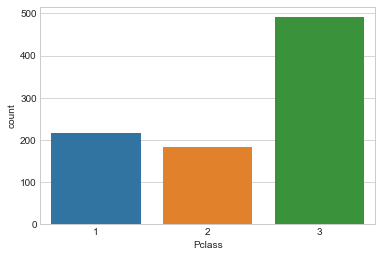

In [25]:
sns.countplot(x='Pclass',data=train)

In [26]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

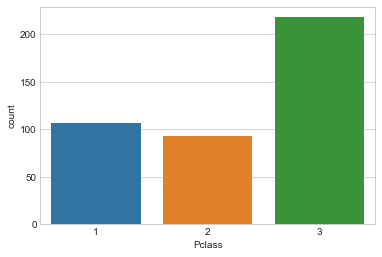

In [27]:
sns.countplot(x='Pclass',data=test)

no need of any change in the Pclass column

### Name

In [28]:
train['name_def']=list(map(lambda x:x.split('.')[0].split()[-1] ,train['Name']))
#del train['Name']
test['name_def']=list(map(lambda x:x.split('.')[0].split()[-1] ,test['Name']))
#del test['Name']

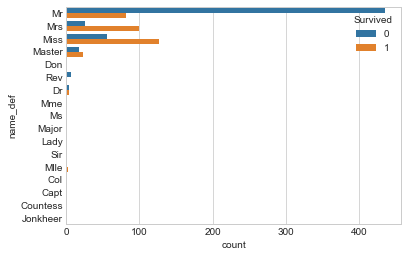

In [29]:
sns.countplot(y='name_def',hue='Survived',data=train)

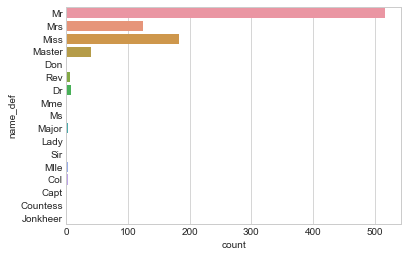

In [30]:
sns.countplot(y='name_def',data=train)

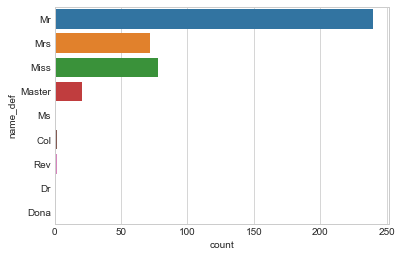

In [31]:
sns.countplot(y='name_def',data=test)

### Sex

In [32]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

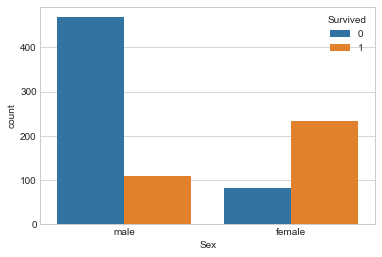

In [33]:
sns.countplot(x='Sex',hue='Survived',data=train)

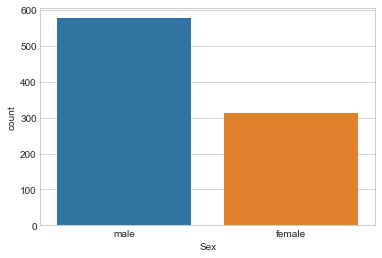

In [34]:
sns.countplot(x='Sex',data=train)

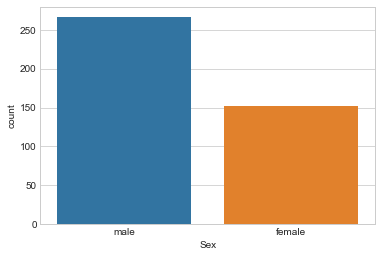

In [35]:
sns.countplot(x='Sex',data=test)

transforming values in Sex column

In [36]:
sex_train_d=pd.get_dummies(train['Sex'])
sex_test_d=pd.get_dummies(test['Sex'])
train.drop('Sex',axis=1,inplace=True)
test.drop('Sex',axis=1,inplace=True)

### Age

In [37]:
train['Age'].isnull().sum()

177

In [38]:
test['Age'].isnull().sum()

86

In [39]:
train['Age'].fillna(train.groupby('name_def')['Age'].transform('median'),inplace=True)

In [40]:
test['Age'].fillna(test.groupby('name_def')['Age'].transform('median'),inplace=True)

In [41]:
test['Age'].fillna(train.groupby('name_def')['Age'].transform('median'),inplace=True)

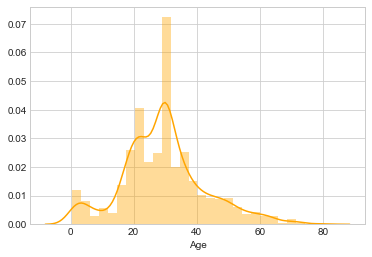

In [42]:
sns.distplot(train['Age'],color='orange')

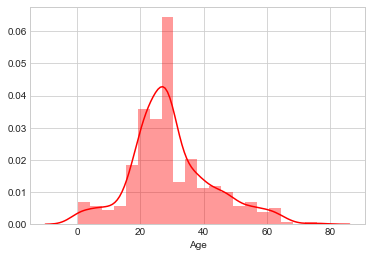

In [43]:
sns.distplot(test['Age'],color='red')

### SibSp

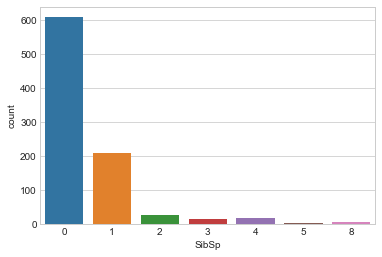

In [44]:
sns.countplot(x='SibSp',data=train)

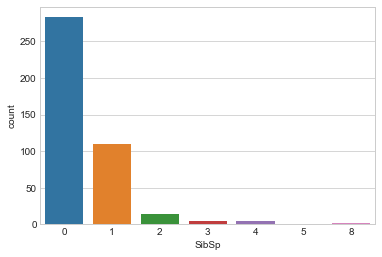

In [45]:
sns.countplot(x='SibSp',data=test)

no transformation required

### Parch

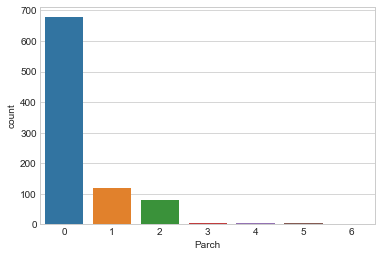

In [46]:
sns.countplot(x='Parch',data=train)

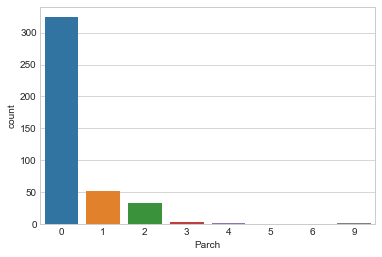

In [47]:
sns.countplot(x='Parch',data=test)

### Name

In [48]:
name_def_mapping={'Capt':4,'Col':4,'Countess':2,'Don':3,'Dona':2,'Dr':4,'Jonkheer':3,'Lady':2,'Major':4,'Master':1,'Miss':2,'Mlle':2,'Mme':2,'Mr':1,'Mrs':2,'Ms':1,'Rev':3,'Sir':3}
train['name_def']=train['name_def'].map(name_def_mapping)
test['name_def']=test['name_def'].map(name_def_mapping)

In [49]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

### Ticket

In [50]:
train['ticket_number']=list(map(lambda x:x.split()[-1],train['Ticket']))
test['ticket_number']=list(map(lambda x:x.split()[-1],test['Ticket']))

In [51]:
def typ(a):
    a=str(a)
    if len(a.split())==2:
        return a.split()[0]
    else:
        return 'z'

train['ticket_type']=list(map(lambda x:typ(x),train['Ticket']))
test['ticket_type']=list(map(lambda x:typ(x),test['Ticket']))

In [52]:
def repl(z):
    z=z.upper()
    z=z.replace(".","")
    z=z.replace("/","")
    z=z.replace('4','')
    z=z.replace('5','')
    z=z.replace('2','')
    z=z.replace('3','')
    return z

train['ticket_type']=list(map(lambda x:repl(x),train['ticket_type']))
test['ticket_type']=list(map(lambda x:repl(x),test['ticket_type']))

In [53]:
ticket_type_mapping={'A':1,'SCA':1,'SP':1,'SOC':1,'WC':1,'SOTONOQ':1,'SOP':1,'FA':1,'SCOW':1,'AS':1,'SOPP':1,'FC':1,'SOTONO':1,'CASOTON':1,'PC':2,'PP':2,'FCC':3,'SWPP':3,'SC':3,'Z':4,'CA':4,'WEP':4,'STONO':5,'SCPARIS':5,'C':5,'PPP':5,'SCAC':5,'SCAH':5,'AQ':5,'LP':5,'STONOQ':5}

test['ticket_type']=test['ticket_type'].map(ticket_type_mapping)
train['ticket_type']=train['ticket_type'].map(ticket_type_mapping)

### Cabin

In [54]:
train['Cabin']=train['Cabin'].str[:1]
test['Cabin']=test['Cabin'].str[:1]

In [55]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [56]:
test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [57]:
cabin_mapping={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}

train['Cabin']=train['Cabin'].map(cabin_mapping)
test['Cabin']=test['Cabin'].map(cabin_mapping)

In [58]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

### Embarked

In [59]:
train['Embarked'].fillna('S',inplace=True)

In [60]:
emb_train_d=pd.get_dummies(train['Embarked'])
emb_test_d=pd.get_dummies(test['Embarked'])

### Fair

In [61]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

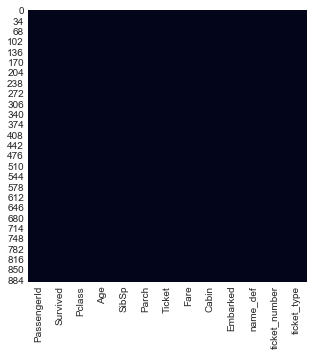

In [62]:
plt.figure(figsize=(5,5))
sns.heatmap(train.isnull(),cbar=False)

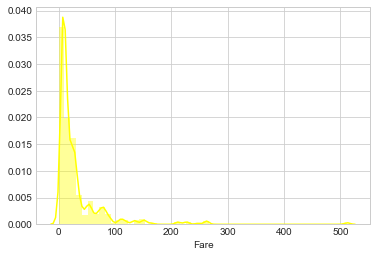

In [63]:
sns.distplot(train['Fare'],color='yellow')

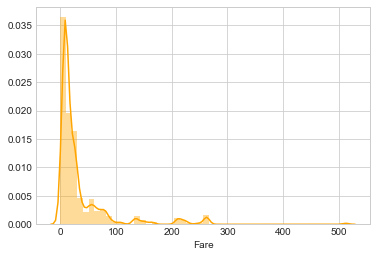

In [64]:
sns.distplot(test['Fare'],color='orange')

### Is any missing values still available

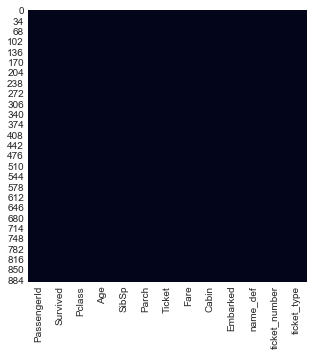

In [65]:
plt.figure(figsize=(5,5))
sns.heatmap(train.isnull(),cbar=False)

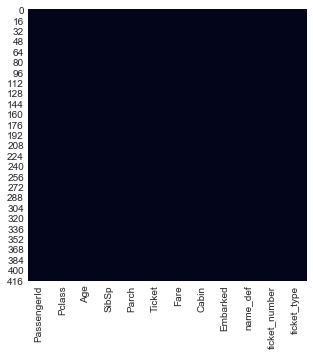

In [66]:
plt.figure(figsize=(5,5))
sns.heatmap(test.isnull(),cbar=False)

### Making final dataset

In [67]:
train_y=train['Survived']

In [68]:
train=train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Cabin','name_def','ticket_type']]
test=test[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Cabin','name_def','ticket_type']]

In [69]:
train_x=pd.concat([train,sex_train_d,emb_train_d],axis=1)
test_x=pd.concat([test,sex_test_d,emb_test_d],axis=1)

In [70]:
train_x.shape

(891, 14)

### Splitting Dataset for checking accuracy

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_trial_train,X_trial_validation,Y_trial_train,Y_trial_validation=train_test_split(train_x,train_y,test_size=0.2,random_state=12)

# Logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lreg=LogisticRegression()

In [75]:
lreg.fit(X_trial_train,Y_trial_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
pred_lreg=lreg.predict(X_trial_validation)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(Y_trial_validation,pred_lreg)

0.7877094972067039

# Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtf=DecisionTreeClassifier(max_depth=5,random_state=0)

In [81]:
dtf.fit(X_trial_train,Y_trial_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [82]:
pred_dtf=dtf.predict(X_trial_validation)

In [83]:
accuracy_score(pred_dtf,Y_trial_validation)

0.7262569832402235

## Final File

In [84]:
lreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
prediction=lreg.predict(test_x)

In [86]:
df=pd.DataFrame()

In [87]:
df['PassengerId']=test['PassengerId']

In [88]:
df['Survived']=prediction

In [89]:
#df.to_csv('submission_file.csv',header=True,index=False)

In [90]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
